<a href="https://colab.research.google.com/github/silva-felipe/BootCamp_Alura_DataScience/blob/main/notebooks/modulo3/projeto_modulo_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font size=7>**Instalando e importando os modulos necessários**</font>

<font size=5>O módulo plotly é uma biblioteca para visualização de dados assim como matplotlib e seaborn, porém com recursos interativos.</font>

<b>Plotly:</b> https://plotly.com/python/

In [1]:
!pip install plotly

In [2]:
# !pip install notebook

In [3]:
# !pip install ipywidgets

In [4]:
# !pip install geopandas

<font size=5>Importando os módulos necessários</font>

In [6]:
import pandas as pd
# import geopandas as gpd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
import matplotlib.dates as mdates

from datetime import timedelta

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

#<font size=7>**Pegando o dataset**</font>

<font size=5>A escolha do dataset se deu pela quantidade de dados fornecidos e sua acurácia. Os dados foram coletados do repositorio do "Our World in Data". https://github.com/owid </font>

In [7]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

In [8]:
df_owid = pd.read_csv(url, sep=',')
df_owid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


#<font size=7>**Visualizando os dados**</font>

##<font size=5>**Verificando quais os paises com maiores números de casos**</font>

In [9]:
df_owid[df_owid['date'] == '2021-06-23'].sort_values(by='total_cases', ascending=False)[:20]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
98576,OWID_WRL,NaN,World,2021-06-23,179595551.0,437255.0,364704.429,3891856.0,9523.0,8377.714,23040.435,56.096,46.788,499.289,1.222,1.075,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.800555e+09,1.747157e+09,802248885.0,43122139.0,41926359.0,35.93,22.41,10.29,5379.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN
5227,OWID_ASI,NaN,Asia,2021-06-23,54856975.0,139276.0,132529.571,773779.0,2659.0,2682.714,11823.013,30.017,28.563,166.768,0.573,0.578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.685102e+09,1.049187e+09,363002967.0,32032166.0,31458822.0,36.32,22.61,7.82,6780.0,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30588,OWID_EUR,NaN,Europe,2021-06-23,47874582.0,50674.0,42369.714,1098042.0,1086.0,897.857,63945.314,67.684,56.593,1466.637,1.451,1.199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.743567e+08,2.941063e+08,189393231.0,5270393.0,4998030.0,63.36,39.28,25.30,6676.0,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66597,OWID_NAM,NaN,North America,2021-06-23,39493488.0,27575.0,23442.286,898132.0,908.0,631.429,66703.837,46.574,39.594,1516.930,1.534,1.066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.178762e+08,2.460603e+08,183818543.0,2252542.0,2316040.0,70.58,41.56,31.05,3912.0,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95268,USA,North America,United States,2021-06-23,33577651.0,12436.0,11300.857,602933.0,375.0,300.714,101442.243,37.571,34.141,1821.535,1.133,0.908,0.97,3699.0,11.175,12597.0,38.057,NaN,NaN,NaN,NaN,736435.0,465883543.0,1407.492,2.225,607536.0,1.835,0.019,52.6,tests performed,3.198721e+08,1.779489e+08,150787303.0,648209.0,993840.0,95.64,53.21,45.09,2972.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926,NaN
31116,OWID_EUN,NaN,European Union,2021-06-23,32642643.0,14916.0,12352.429,737016.0,425.0,343.571,73367.599,33.525,27.763,1656.517,0.955,0.772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.397082e+08,2.160118e+08,132821437.0,4507678.0,3973221.0,76.35,48.55,29.85,8930.0,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83630,OWID_SAM,NaN,South America,2021-06-23,32035885.0,186399.0,140795.429,981660.0,4350.0,3704.571,74370.652,432.721,326.854,2278.904,10.098,8.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.673806e+08,1.172570e+08,50358395.0,2631772.0,2585627.0,38.86,27.22,11.69,6002.0,NaN,4.307598e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41869,IND,Asia,India,2021-06-23,30082778.0,54069.0,54637.857,391981.0,1321.0,1439.714

##<font size=5>**Pegando os 3 países com maior número de casos**</font>

In [10]:
countries = ['United States','India','Brazil']

Utilizando o query do pandas para realizar essa procura

In [11]:
df_covid_top3 = df_owid.query('location in @countries')
df_covid_top3.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
12716,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12717,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12718,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12719,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,9.91
12720,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN


In [12]:
df_covid_top3['date'] = pd.to_datetime(df_covid_top3['date'], format='%Y-%m-%d')

In [13]:
df_covid_top3['day'] = df_covid_top3['date'].dt.day
df_covid_top3['month'] = df_covid_top3['date'].dt.month
df_covid_top3['year'] = df_covid_top3['date'].dt.year

Visualizando o DataFrame

In [14]:
df_covid_top3.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,day,month,year
12716,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,26,2,2020
12717,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,27,2,2020
12718,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,28,2,2020
12719,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,9.91,29,2,2020
12720,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,1,3,2020


Setando as cores de cada país para padronizar os plots

In [15]:
cor_br, cor_ind, cor_us = '#569423', '#E07958', '#1C3094'

##Plotando o total de casos para os paises selecionados

In [16]:
x_brasil = list(df_covid_top3[df_covid_top3['location'] == 'Brazil']['date'])
x_india = list(df_covid_top3[df_covid_top3['location'] == 'India']['date'])
x_us = list(df_covid_top3[df_covid_top3['location'] == 'United States']['date'])

y_brasil = list(df_covid_top3[df_covid_top3['location'] == 'Brazil']['total_cases'])
y_india = list(df_covid_top3[df_covid_top3['location'] == 'India']['total_cases'])
y_us = list(df_covid_top3[df_covid_top3['location'] == 'United States']['total_cases'])

fig = go.Figure()

fig.add_trace(go.Scatter(
    x = x_brasil,
    y = y_brasil,
    name='Brazil',
    marker_color=cor_br
))

fig.add_trace(go.Scatter(
    x = x_india,
    y = y_india,
    name='India',
    marker_color=cor_ind
))

fig.add_trace(go.Scatter(
    x = x_us,
    y = y_us,
    name='United States',
    marker_color=cor_us
))

fig.update_layout(
    title="Total cases of COVID-19 in Brasil, India and US",
    xaxis_title="Period",
    yaxis_title="Number of cases",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="black"
    )
)

fig.show()

##<font size=5>**Análise**</font>

Observando o gráfico acima podemos verificar que os E.U.A é o país que apresenta o maior número de casos para covid no mundo até o presente momento (Julho/2021) com quase 35Mi de casos confirmados, seguido por Índia e Brasil apresentando 30Mi e 18Mi respectivamente. Observando a inclinação da curva veremos que os casos de COVID-19 nos E.U.A. estão num platô desde Maio de 2021, enquanto Índia e Brasil ainda estão num crescente no número de casos.


##<font size=6>*Brasil - Casos*</font>

In [17]:
owid_brasil = df_covid_top3[df_covid_top3['location'] == 'Brazil']

In [18]:
x_line = list(owid_brasil['date'])
y_line = list(owid_brasil['new_cases_smoothed'])

x_bar = list(owid_brasil['date'])
y_bar = list(owid_brasil['new_cases'])

In [19]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=x_line,
        y=y_line,
        marker_color='firebrick',
        name='Moving avarage'
    ))
# fig.update_traces(marker_color='red')


fig.add_trace(
    go.Bar(
        x=x_bar,
        y=y_bar,
        marker_color=cor_br,
        name='New cases'
    ))

fig.update_layout(
    title="Total cases of COVID-19 in Brasil",
    xaxis_title="Period",
    yaxis_title="Number of cases",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="black"
    )
)

fig.show()

##<font size=6>*E.U.A - Casos*</font>

In [20]:
owid_us = df_covid_top3[df_covid_top3['location'] == 'United States']

In [21]:
x_line = list(owid_us['date'])
y_line = list(owid_us['new_cases_smoothed'])

x_bar = list(owid_us['date'])
y_bar = list(owid_us['new_cases'])

In [22]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=x_line,
        y=y_line,
        marker_color='firebrick',
        name='Moving avarage'
    ))
# fig.update_traces(marker_color='red')


fig.add_trace(
    go.Bar(
        x=x_bar,
        y=y_bar,
        marker_color=cor_us,
        name='New cases'
    ))

fig.update_layout(
    title="Total cases of COVID-19 in the U.S.",
    xaxis_title="Period",
    yaxis_title="Number of cases",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="black"
    )
)

fig.show()

##<font size=6>*Índia - Casos*</font>

In [23]:
owid_india = df_covid_top3[df_covid_top3['location'] == 'India']

In [24]:
x_line = list(owid_india['date'])
y_line = list(owid_india['new_cases_smoothed'])

x_bar = list(owid_india['date'])
y_bar = list(owid_india['new_cases'])

In [25]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=x_line,
        y=y_line,
        marker_color='firebrick',
        name='Moving avarage'
    ))
# fig.update_traces(marker_color='red')


fig.add_trace(
    go.Bar(
        x=x_bar,
        y=y_bar,
        marker_color=cor_ind,
        name='New cases'
    ))

fig.update_layout(
    title="Total cases of COVID-19 in India",
    xaxis_title="Period",
    yaxis_title="Number of cases",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="black"
    )
)

fig.show()

##Plotando o números de casos novos e a média movel dos casos dos paises selecionados

In [162]:
fig = make_subplots(
    rows = 3, cols = 1,
    #specs = [[{},{}], [{'colspan':2}, None]],
    subplot_titles = ('Brazil','India', 'United States'), vertical_spacing=0.1)

fig.add_trace(go.Scatter(x=owid_brasil['date'], y=owid_brasil['new_cases_smoothed'],
                         marker_color='firebrick', name='Moving avarage - BR'), 1,1)

fig.add_trace(go.Bar(x=owid_brasil['date'], y=owid_brasil['new_cases'],
                         marker_color=cor_br, name='New cases - BR'), 1,1)


fig.add_trace(go.Scatter(x=owid_india['date'], y=owid_india['new_cases_smoothed'],
                         marker_color='firebrick', name='Moving avarage - IND'), 2,1)

fig.add_trace(go.Bar(x=owid_india['date'], y=owid_india['new_cases'],
                         marker_color=cor_ind, name='New cases - IND'), 2,1)


fig.add_trace(go.Scatter(x=owid_us['date'], y=owid_us['new_cases_smoothed'],
                         marker_color='firebrick', name='Moving avarage - U.S.'), 3,1)

fig.add_trace(go.Bar(x=owid_us['date'], y=owid_us['new_cases'],
                         marker_color=cor_us, name='New cases - U.S.'), 3,1)

fig.update_layout(width=1000, height=1000, title='Covid-19 new cases and moving avarage')

fig.show()

##Plotando o números de mortes e a média movel de mortos dos paises selecionados

In [163]:
x_brasil = list(df_covid_top3[df_covid_top3['location'] == 'Brazil']['date'])
x_india = list(df_covid_top3[df_covid_top3['location'] == 'India']['date'])
x_us = list(df_covid_top3[df_covid_top3['location'] == 'United States']['date'])

y_brasil = list(df_covid_top3[df_covid_top3['location'] == 'Brazil']['total_deaths'])
y_india = list(df_covid_top3[df_covid_top3['location'] == 'India']['total_deaths'])
y_us = list(df_covid_top3[df_covid_top3['location'] == 'United States']['total_deaths'])

fig = go.Figure()

fig.add_trace(go.Scatter(
    x = x_brasil,
    y = y_brasil,
    name='Brazil',
    marker_color=cor_br
))

fig.add_trace(go.Scatter(
    x = x_india,
    y = y_india,
    name='India',
    marker_color=cor_ind
))

fig.add_trace(go.Scatter(
    x = x_us,
    y = y_us,
    name='United States',
    marker_color=cor_us
))

fig.update_layout(
    title="Total deaths by COVID-19 in Brazil, India and US",
    xaxis_title="Period",
    yaxis_title="Number of deaths",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="black"
    )
)

fig.show()

##**Subplots**

Plot agrupado do total de casos por milhão, assim fica mais fácil fazer a comparação do número de casos

In [165]:
fig = make_subplots(
    rows = 3, cols = 1,
    #specs = [[{},{}], [{'colspan':2}, None]],
    subplot_titles = ('Brazil','India', 'United States'))

fig.add_trace(go.Bar(x=owid_brasil['date'], y=owid_brasil['total_cases_per_million'],
                     marker=dict(color=owid_brasil['total_cases_per_million'], coloraxis='coloraxis')), 1,1)

fig.add_trace(go.Bar(x=owid_india['date'], y=owid_india['total_cases_per_million'],
                     marker=dict(color=owid_india['total_cases_per_million'], coloraxis='coloraxis')), 2,1)

fig.add_trace(go.Bar(x=owid_us['date'], y=owid_us['total_cases_per_million'],
                     marker=dict(color=owid_us['total_cases_per_million'], coloraxis='coloraxis')), 3,1)

fig.update_layout(coloraxis=dict(colorscale='Bluered'), showlegend=False, title_text='Cases of Covid')

fig.update_layout(width=1000, height=1000)

fig.show()

<font size=5>**Análise**</font>

Verificando as curvas para o número de mortes, podemos observar que o número de mortes nos E.U.A atingiram o número alarmante de 600K mortes em Junho de 2021 e praticamente se estabilizaram, os registros de mortes na Índia apresentam um aumento pequeno no número de casos que parece estar se estabilizando a partir do mês de Julho de 2021 com cerca de 300k mortes, enquando os casos no Brasil ainda apresentam um incremento alarmente no número de morte, para mais de 500k mortes. Levando em consideração a população dos 3 paises a taxa de morte no Brasil é ridiculamente enorme.

##<font size=6>*Brasil - Mortes*</font>

In [28]:
x_line = list(owid_brasil['date'])
y_line = list(owid_brasil['new_deaths_smoothed'])

x_bar = list(owid_brasil['date'])
y_bar = list(owid_brasil['new_deaths'])

In [29]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=x_line,
        y=y_line,
        marker_color='firebrick',
        name='Moving avarage'
    ))
# fig.update_traces(marker_color='red')


fig.add_trace(
    go.Bar(
        x=x_bar,
        y=y_bar,
        name='New cases',
        marker_color=cor_br
    ))

fig.update_layout(
    title="Total deaths of COVID-19 in Brazil",
    xaxis_title="Period",
    yaxis_title="Number of deaths",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="black"
    )
)

fig.show()

##<font size=6>*E.U.A. - Mortes*</font>

In [30]:
x_line = list(owid_us['date'])
y_line = list(owid_us['new_deaths_smoothed'])

x_bar = list(owid_us['date'])
y_bar = list(owid_us['new_deaths'])

In [31]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=x_line,
        y=y_line,
        marker_color='firebrick',
        name='Moving avarage'
    ))
# fig.update_traces(marker_color='red')


fig.add_trace(
    go.Bar(
        x=x_bar,
        y=y_bar,

        name='New cases',
        marker_color=cor_us
    ))

fig.update_layout(
    title="Total deaths of COVID-19 in the U.S.",
    xaxis_title="Period",
    yaxis_title="Number of deaths",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="black"
    )
)

fig.show()

##<font size=6>*Índia - Mortes*</font>

In [32]:
x_line = list(owid_india['date'])
y_line = list(owid_india['new_deaths_smoothed'])

x_bar = list(owid_india['date'])
y_bar = list(owid_india['new_deaths'])

In [33]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=x_line,
        y=y_line,
        marker_color='firebrick',
        name='Moving avarage'
    ))
# fig.update_traces(marker_color='red')


fig.add_trace(
    go.Bar(
        x=x_bar,
        y=y_bar,
        name='New cases',
        marker_color=cor_ind
    ))

fig.update_layout(
    title="Total deaths of COVID-19 in India",
    xaxis_title="Period",
    yaxis_title="Number of deaths",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="black"
    )
)

fig.show()

##Plotando o numero de mortes normalizado

In [215]:
fig = make_subplots(
    rows = 3, cols = 1,
    #specs = [[{},{}], [{'colspan':2}, None]],
    subplot_titles = ('Brazil','India', 'United States'))

fig.add_trace(go.Bar(x=owid_brasil['date'], y=owid_brasil['total_deaths_per_million'],
                     marker=dict(color=owid_brasil['total_deaths_per_million'], coloraxis='coloraxis')), 1,1)

fig.add_trace(go.Bar(x=owid_india['date'], y=owid_india['total_deaths_per_million'],
                     marker=dict(color=owid_india['total_deaths_per_million'], coloraxis='coloraxis')), 2,1)

fig.add_trace(go.Bar(x=owid_us['date'], y=owid_us['total_deaths_per_million'],
                     marker=dict(color=owid_us['total_deaths_per_million'], coloraxis='coloraxis')), 3,1)

fig.update_layout(coloraxis=dict(colorscale='Bluered'), showlegend=False, title_text='Deaths by covid')

fig.update_layout(width=1000, height=1000)

fig.show()

##**Dados covid Brasil**

In [34]:
owid_brasil

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,day,month,year
12716,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,26,2,2020
12717,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,27,2,2020
12718,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,28,2,2020
12719,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,9.91,29,2,2020
12720,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,1,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13205,BRA,South America,Brazil,2021-06-29,18513305.0,64903.0,65521.714,515985.0,1893.0,1609.714,87097.085,305.341,308.251,2427.486,8.906,7.573,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98827485.0,72722360.0,26105125.0,1913556.0,1250068.0,46.49,34.21,12.28,5881.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,29,6,2021
13206,BRA,South America,Brazil,2021-06-30,18557141.0,43836.0,55322.857,518066.0,2081.0,1565.286,87303.315,206.229,260.270,2437.276,9.790,7.364,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1315689.0,NaN,NaN,NaN,6190.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,30,6,2021
13207,BRA,South America,Brazil,2021-07-01,18622304.0,65163.0,54117.286,520095.0,2029.0,1564.857,87609.879,306.564,254.598,2446.822,9.546,7.362,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#<font size=7>**Previsão de mortes para os paises com Prophet**</font>

##Plotando o perfil da curva de morte 

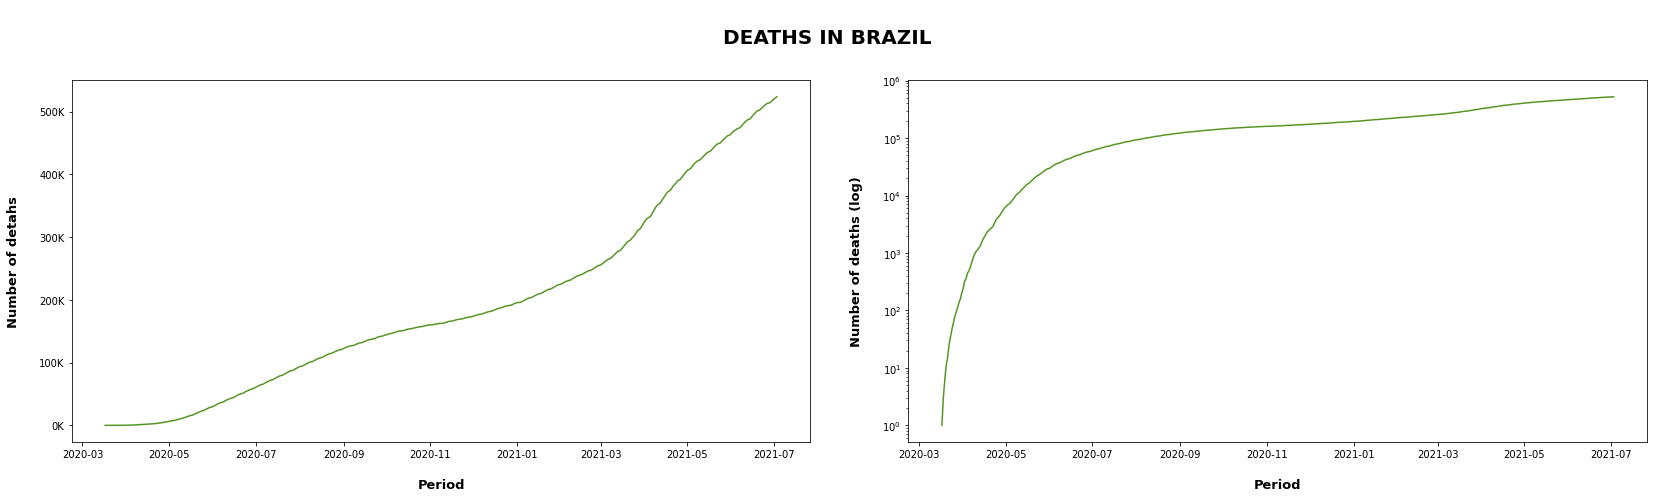

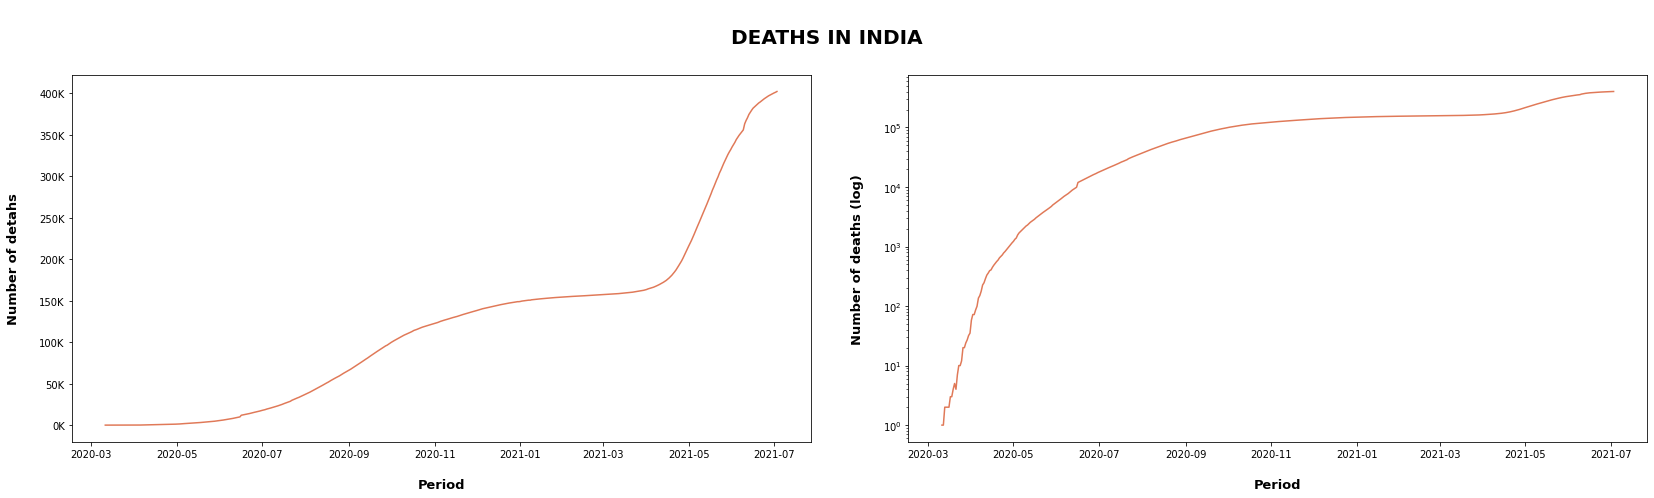

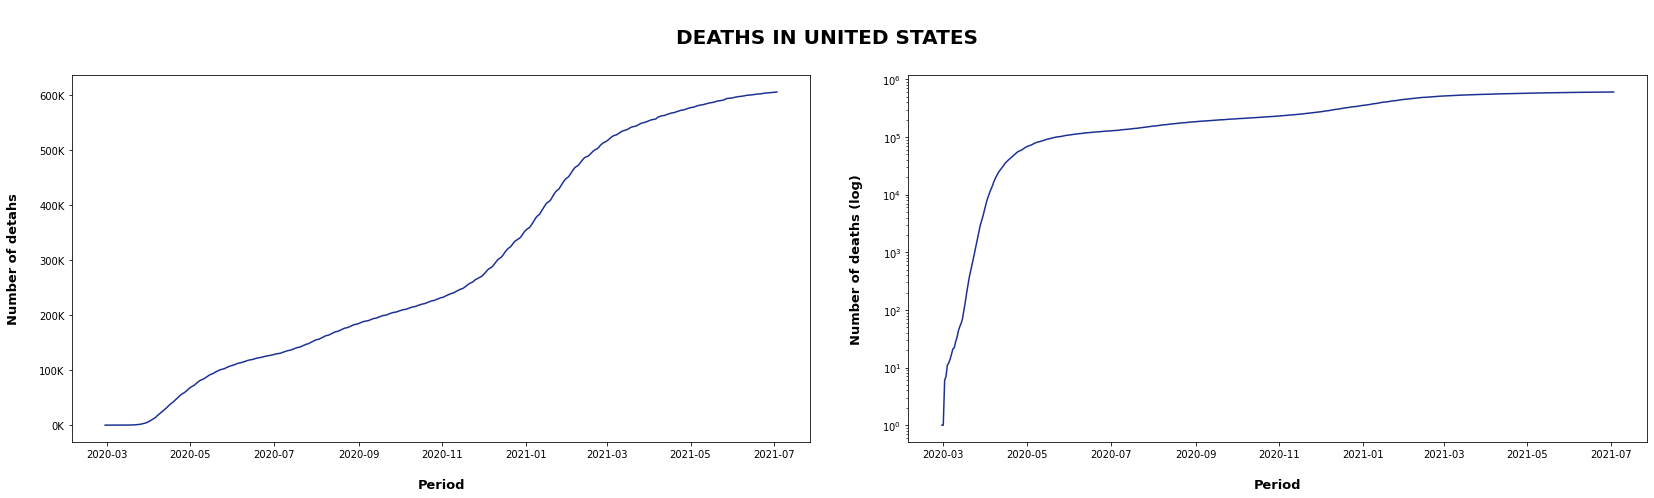

In [35]:
countries = [x for x in df_covid_top3.location.unique()]
colors = [cor_br, cor_ind, cor_us]

# s = ''
i = 1
for c, x in enumerate(countries):
  # s = s + ' ' + x

  figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(25,8))

  plt.subplot(i,2,1)
  ax = sns.lineplot(data = df_covid_top3.query('location in @x'), 
                    x = 'date',
                    y = df_covid_top3.query('location in @x')['total_deaths']/1000,
                    color=colors[c])

  plt.ylabel('Number of detahs\n', weight='bold', fontsize=13)
  plt.xlabel('\nPeriod', weight='bold', fontsize=13)

  plt.subplot(i,2,2)
  sns.lineplot(data=df_covid_top3.query('location in @x'), x='date',y='total_deaths', color=colors[c])

  plt.ylabel('Number of deaths (log)\n', weight='bold', fontsize=13)
  plt.xlabel('\nPeriod', weight='bold', fontsize=13)

  plt.yscale('log')

  figure.tight_layout(pad=2.5)

  plt.suptitle('\nDeaths in {}\n'.format(x).upper(), 
            weight='bold',
            fontsize=20)
  
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}K"))  
  
  plt.tight_layout(pad=8, w_pad=4, h_pad=20)

  i =+ 1

  plt.show()

##<font size=5>*Correlação casos e mortes*</font>

In [36]:
for x in df_covid_top3.location.unique():
  corr = df_covid_top3.query('location in @x')[['new_cases','new_deaths_smoothed']].corr(method = 'pearson')['new_deaths_smoothed'][0]
  corr = float("{:.4f}".format(corr))
  print('Correlation between new cases of COVID-19 and 7-day-death is {} in {}'.format(corr, x))

Correlation between new cases of COVID-19 and 7-day-death is 0.7146 in Brazil
Correlation between new cases of COVID-19 and 7-day-death is 0.8099 in India
Correlation between new cases of COVID-19 and 7-day-death is 0.7362 in United States


De acordo com a tabela apresentada em https://www.alura.com.br/artigos/funcao-de-autocorrelacao podemos dizer que para todos os paises analisados existe uma correlação forte entre os casos e as mortes.

##Plotando o número de casos com o regplot do seaborn 

o regplot mostra a regressão linear e a dispersão dos dados

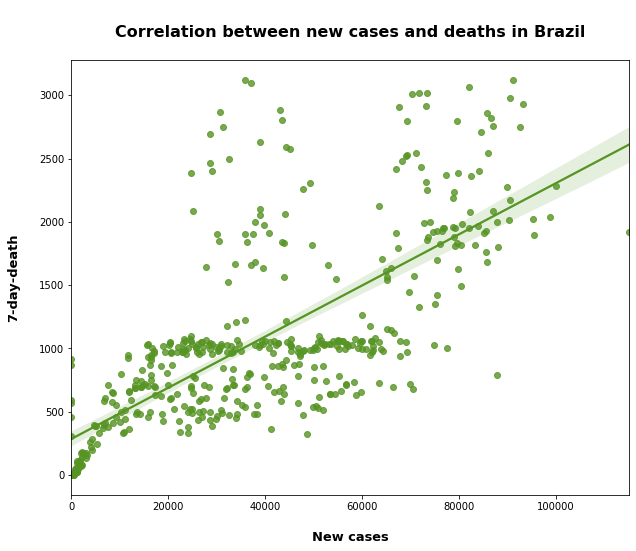

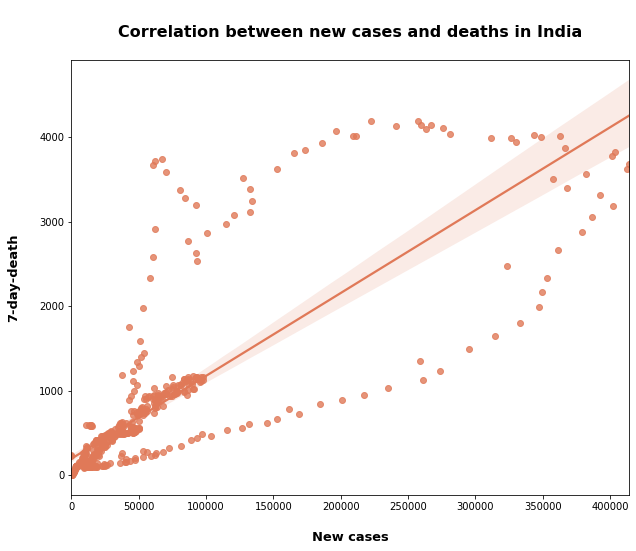

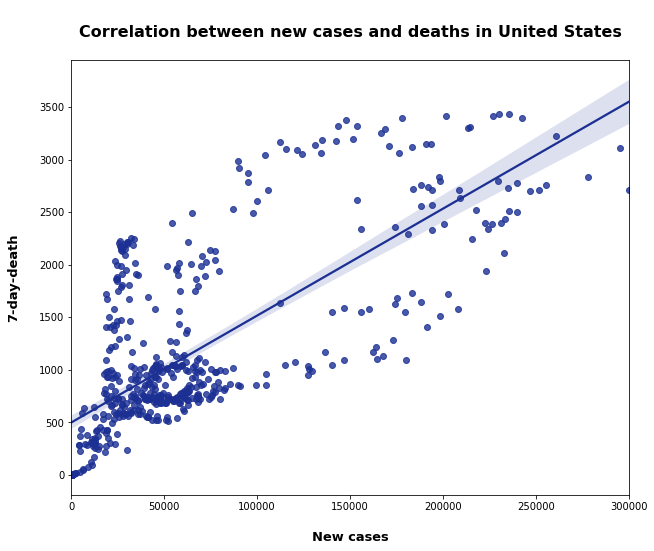

In [37]:
colors = [cor_br, cor_ind, cor_us]
i = 1

for c, x in enumerate(df_covid_top3.location.unique()):

  figure, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,8))

  plt.subplot(i,1,1)

  ax = sns.regplot(data=df_covid_top3.query('location in @x'), x='new_cases',y='new_deaths_smoothed', color=colors[c])

  plt.ylabel('7-day-death\n', weight='bold', fontsize=13)

  plt.xlabel('\nNew cases', weight='bold', fontsize=13)

  plt.title('\nCorrelation between new cases and deaths in {}\n'.format(x), weight='bold', fontsize=16)

  plt.tight_layout(pad=500, w_pad=89, h_pad=100)

  plt.show()

  i =+ 1


In [38]:
owid_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,day,month,year
12716,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,26,2,2020
12717,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,27,2,2020
12718,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,28,2,2020
12719,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,9.91,29,2,2020
12720,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,1,3,2020


In [39]:
owid_brasil.query('year == 2021 & month == 5')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,day,month,year
13146,BRA,South America,Brazil,2021-05-01,14725975.0,66964.0,59680.000,406437.0,2656.0,2420.714,69279.337,315.037,280.769,1912.110,12.495,11.388,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43036179.0,29336953.0,13699226.0,337317.0,757933.0,20.25,13.80,6.44,3566.0,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,1,5,2021
13147,BRA,South America,Brazil,2021-05-02,14754910.0,28935.0,59160.429,407639.0,1202.0,2406.000,69415.464,136.127,278.324,1917.765,5.655,11.319,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43173356.0,29421191.0,13752165.0,137177.0,735178.0,20.31,13.84,6.47,3459.0,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,2,5,2021
13148,BRA,South America,Brazil,2021-05-03,14779529.0,24619.0,58586.571,408622.0,983.0,2383.714,69531.286,115.822,275.624,1922.390,4.625,11.214,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43962159.0,29865013.0,14097146.0,788803.0,710754.0,20.68,14.05,6.63,3344.0,56.94,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,3,5,2021
13149,BRA,South America,Brazil,2021-05-04,14856888.0,77359.0,59332.143,411588.0,2966.0,2366.571,69895.226,363.941,279.132,1936.343,13.954,11.134,1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45273825.0,30658945.0,14614880.0,1311666.0,729289.0,21.30,14.42,6.88,3431.0,56.94,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,4,5,2021
13150,BRA,South America,Brazil,2021-05-05,14930183.0,73295.0,58413.429,414399.0,2811.0,2316.286,70240.048,344.821,274.810,1949.568,13.225,10.897,1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46185689.0,31265483.0,14920206.0,911864.0,740290.0,21.73,14.71,7.02,3483.0,56.94,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,5,5,2021
13151,BRA,South America,Brazil,2021-05-06,15003563.0,73380.0,58983.571,416949.0,2550.0,2251.857,70585.269,345.221,277.492,1961.565,11.997,10.594,1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46542392.0,31504414.0,15037978.0,356703.0,650348.0,21.90,14.82,7.07,3060.0,56.94,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,6,5,2021
13152,BRA,South America,Brazil,2021-05-07,15082449.0,78886.0,60491.143,419114.0,2165.0,2190.429,70956.393,371.124,284.585,1971.750,10.185,10.305,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46875460.0,31722544.0,15152916.0,333068.0,596657.0,22.05,14.92,7.13,2807.0,56.94,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.76

##Verificando a sazionalidade nos números de mortes

In [99]:
fig = px.bar(owid_brasil.query('year == 2021 & month == 6'), x='day', y='new_deaths', 
             title='Month deaths seasonality - June, 2021',
             labels={'new_deaths':'New deaths'})
fig.show()

##**Previsões I**

In [100]:
df = pd.DataFrame()

In [101]:
one_week_fcst = owid_brasil.shape[0] - 7

In [102]:
df['ds'] = owid_brasil['date'][:one_week_fcst]
df['y'] = owid_brasil['new_deaths'][:one_week_fcst]

In [103]:
df_test = pd.DataFrame()
df_test['ds'] = owid_brasil['date'][one_week_fcst:]
df_test['y'] = owid_brasil['new_deaths'][one_week_fcst:]

In [104]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [105]:
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
489,2021-06-29
490,2021-06-30
491,2021-07-01
492,2021-07-02
493,2021-07-03


In [106]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
489,2021-06-29,2456.949270,1908.016351,2991.466110
490,2021-06-30,2467.998427,1948.158518,3025.408837
491,2021-07-01,2429.122093,1853.923152,2962.848933
492,2021-07-02,2321.881640,1792.333037,2905.382802
493,2021-07-03,2195.245762,1681.436820,2713.550537


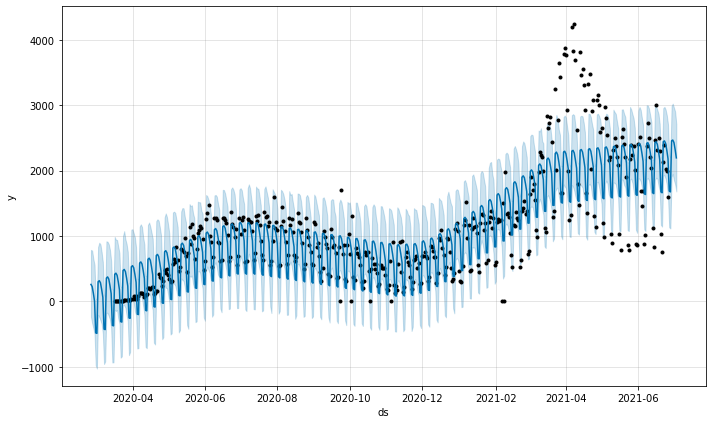

In [107]:
fig1 = m.plot(forecast)

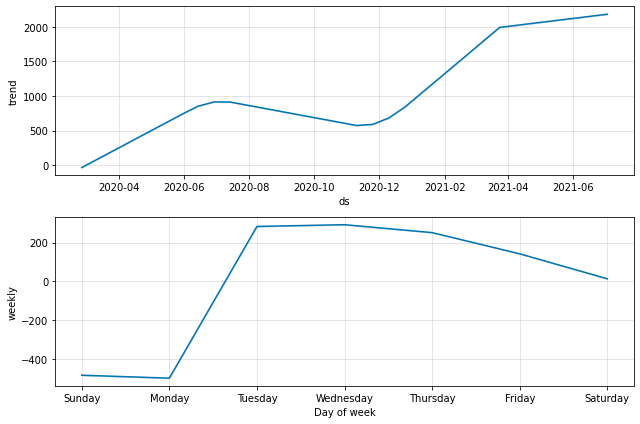

In [108]:
fig2 = m.plot_components(forecast)

In [109]:
forecast[one_week_fcst:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
487,2021-06-27,2170.589907,1132.518343,2237.873359,2170.589907,2170.589907,-482.830713,-482.830713,-482.830713,-482.830713,-482.830713,-482.830713,0.0,0.0,0.0,1687.759194
488,2021-06-28,2172.471596,1114.918825,2205.836795,2172.471596,2172.471596,-497.783152,-497.783152,-497.783152,-497.783152,-497.783152,-497.783152,0.0,0.0,0.0,1674.688444
489,2021-06-29,2174.353286,1908.016351,2991.466110,2174.353286,2174.353286,282.595984,282.595984,282.595984,282.595984,282.595984,282.595984,0.0,0.0,0.0,2456.949270
490,2021-06-30,2176.234976,1948.158518,3025.408837,2176.234976,2176.234976,291.763451,291.763451,291.763451,291.763451,291.763451,291.763451,0.0,0.0,0.0,2467.998427
491,2021-07-01,2178.116666,1853.923152,2962.848933,2178.115274,2178.349756,251.005428,251.005428,251.005428,251.005428,251.005428,251.005428,0.0,0.0,0.0,2429.122093
492,2021-07-02,2179.998355,1792.333037,2905.382802,2179.427483,2180.914464,141.883285,141.883285,141.883285,141.883285,141.883285,141.883285,0.0,0.0,0.0,2321.881640
493,2021-07-03,2181.880045,1681.436820,2713.550537,2180.366144,2183.939308,13.365717,13.365717,13.365717,13.365717,13.365717,13.365717,0.0,0.0,0.0,2195.245762


In [110]:
df_test

,ds,y
13203,2021-06-27,739.0
13204,2021-06-28,618.0
13205,2021-06-29,1893.0
13206,2021-06-30,2081.0
13207,2021-07-01,2029.0
13208,2021-07-02,1857.0
13209,2021-07-03,1635.0


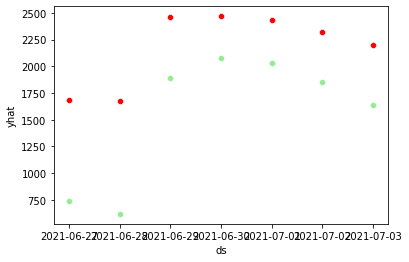

In [111]:
ax = sns.scatterplot(data=forecast[one_week_fcst:], x='ds', y='yhat', color='red')
sns.scatterplot(data=df_test, x='ds', y='y', ax = ax, color='lightgreen')

plt.show()

##**Aperfeiçoando a previsão**

Aperfeiçoando a previsão alterando os parâmtros (changepoint_prior_scale, changepoint_range, n_changepoints)

In [112]:
from fbprophet.plot import add_changepoints_to_plot

In [113]:
m = Prophet(changepoint_prior_scale=15.0, changepoint_range=0.99, n_changepoints=50)
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [114]:
future = m.make_future_dataframe(periods=7)

In [115]:
forecast = m.predict(future)

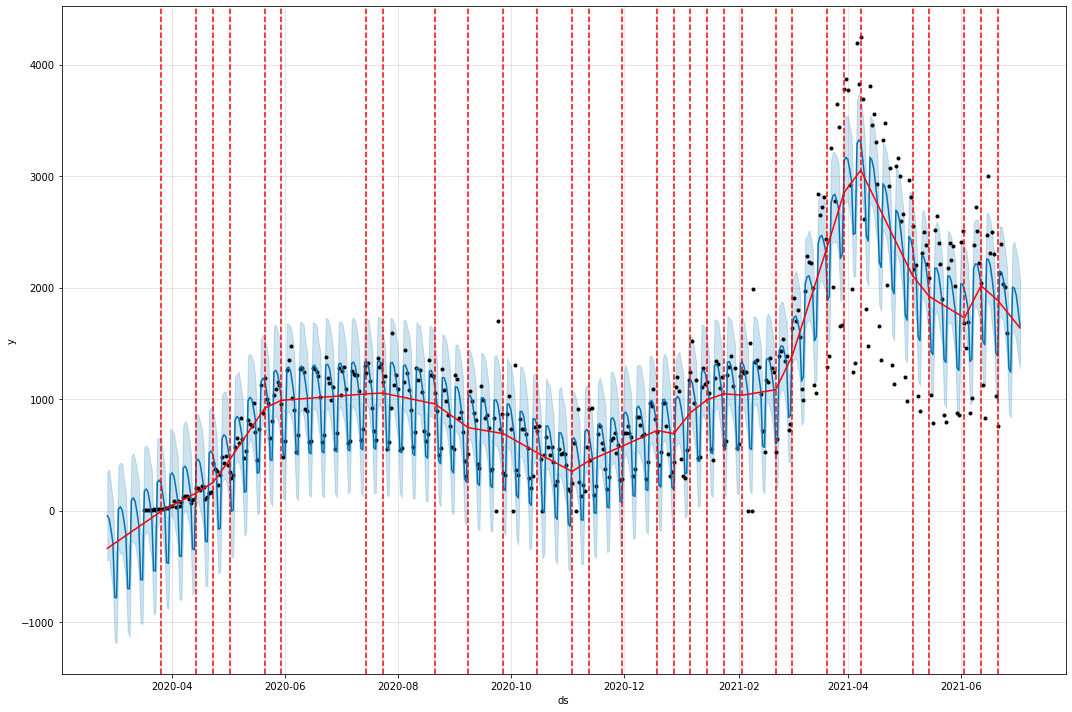

In [116]:
fig = m.plot(forecast, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(), m, forecast)

##**Melhorando as previsoes com os feriados**

In [117]:
holidays_br = '''Data	Dia da Semana	Feriado
01/01/2020	quarta-feira	Confraternização Universal
24/02/2020	segunda-feira	Carnaval
25/02/2020	terça-feira	Carnaval
10/04/2020	sexta-feira	Paixão de Cristo
21/04/2020	terça-feira	Tiradentes
01/05/2020	sexta-feira	Dia do Trabalho
11/06/2020	quinta-feira	Corpus Christi
07/09/2020	segunda-feira	Independência do Brasil
12/10/2020	segunda-feira	Nossa Sr.a Aparecida - Padroeira do Brasil
02/11/2020	segunda-feira	Finados
15/11/2020	domingo	Proclamação da República
25/12/2020	sexta-feira	Natal
Data	Dia da Semana	Feriado
01/01/2021	sexta-feira	Confraternização Universal
15/02/2021	segunda-feira	Carnaval
16/02/2021	terça-feira	Carnaval
02/04/2021	sexta-feira	Paixão de Cristo
21/04/2021	quarta-feira	Tiradentes
01/05/2021	sábado	Dia do Trabalho
03/06/2021	quinta-feira	Corpus Christi
07/09/2021	terça-feira	Independência do Brasil
12/10/2021	terça-feira	Nossa Sr.a Aparecida - Padroeira do Brasil
02/11/2021	terça-feira	Finados
15/11/2021	segunda-feira	Proclamação da República
25/12/2021	sábado	Natal'''

In [118]:
holidays_br = holidays_br.split()

In [119]:
holidays = []
for x in holidays_br:
  if '/' in x:
    holidays.append(x)

In [120]:
holidays

['01/01/2020',
 '24/02/2020',
 '25/02/2020',
 '10/04/2020',
 '21/04/2020',
 '01/05/2020',
 '11/06/2020',
 '07/09/2020',
 '12/10/2020',
 '02/11/2020',
 '15/11/2020',
 '25/12/2020',
 '01/01/2021',
 '15/02/2021',
 '16/02/2021',
 '02/04/2021',
 '21/04/2021',
 '01/05/2021',
 '03/06/2021',
 '07/09/2021',
 '12/10/2021',
 '02/11/2021',
 '15/11/2021',
 '25/12/2021']

In [121]:
from datetime import date
from datetime import datetime

In [122]:
def para_dia(ano_mes: str):
    ano: int = int(ano_mes[6:])
    mes: int = int(ano_mes[3:5])
    dia: int = int(ano_mes[:2])
    return date(ano, mes, dia)

In [123]:
holidays_br = []
for x in holidays:
  holidays_br.append(para_dia(x))

In [124]:
holiday = pd.DataFrame(holidays_br)

In [125]:
holiday = holiday[:19]

In [126]:
holiday['holiday'] = 'br_20_21'

In [127]:
holiday.columns = ['ds','holiday']

In [128]:
holiday

,ds,holiday
0,2020-01-01,br_20_21
1,2020-02-24,br_20_21
2,2020-02-25,br_20_21
3,2020-04-10,br_20_21
4,2020-04-21,br_20_21
5,2020-05-01,br_20_21
6,2020-06-11,br_20_21
7,2020-09-07,br_20_21
8,2020-10-12,br_20_21
9,2020-11-02,br_20_21


In [129]:
m = Prophet(changepoint_prior_scale=15.0, changepoint_range=0.99, n_changepoints=50, holidays=holiday, seasonality_mode='multiplicative')
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [130]:
future = m.make_future_dataframe(periods=7)

In [131]:
forecast = m.predict(future)

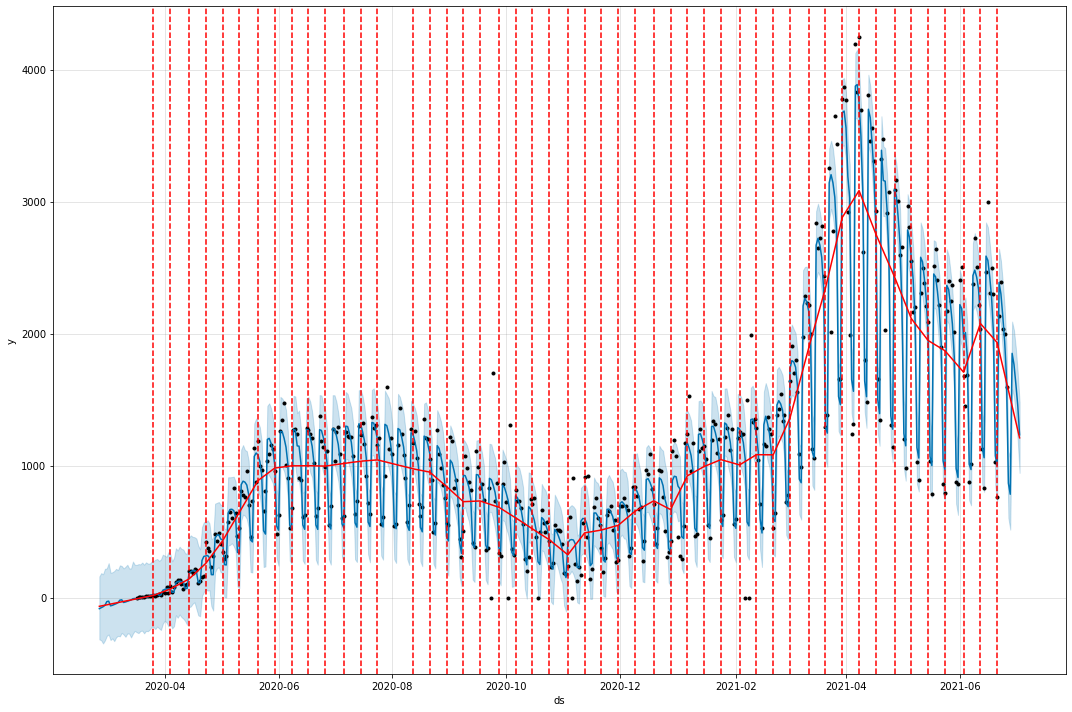

In [132]:
fig = m.plot(forecast, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(), m, forecast)

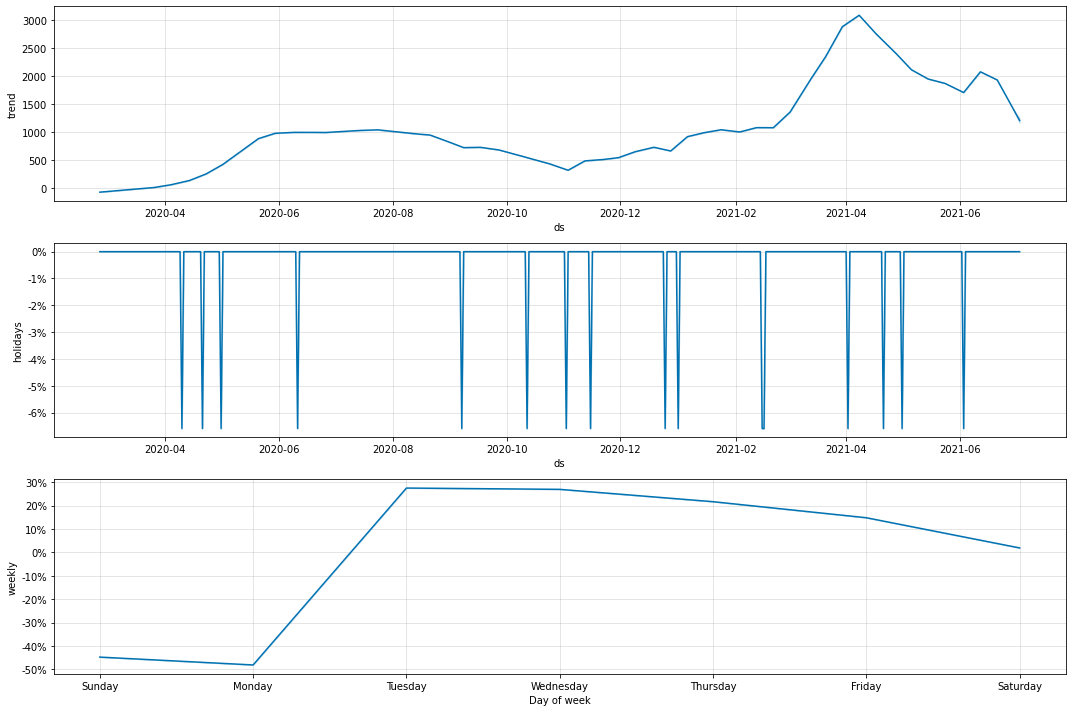

In [133]:
m.plot_components(forecast, figsize=(15,10));

In [134]:
forecast[one_week_fcst:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,br_20_21,br_20_21_lower,br_20_21_upper,holidays,holidays_lower,holidays_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
487,2021-06-27,1571.251706,603.261572,1109.495807,1571.251706,1571.251706,0.0,0.0,0.0,0.0,0.0,0.0,-0.448047,-0.448047,-0.448047,-0.448047,-0.448047,-0.448047,0.0,0.0,0.0,867.256620
488,2021-06-28,1511.151910,515.246307,1053.264276,1511.151910,1511.151910,0.0,0.0,0.0,0.0,0.0,0.0,-0.481657,-0.481657,-0.481657,-0.481657,-0.481657,-0.481657,0.0,0.0,0.0,783.294543
489,2021-06-29,1451.052114,1578.660779,2091.521436,1446.978918,1452.014621,0.0,0.0,0.0,0.0,0.0,0.0,0.275386,0.275386,0.275386,0.275386,0.275386,0.275386,0.0,0.0,0.0,1850.651746
490,2021-06-30,1390.952318,1522.729169,2025.791830,1378.416206,1396.654189,0.0,0.0,0.0,0.0,0.0,0.0,0.269818,0.269818,0.269818,0.269818,0.269818,0.269818,0.0,0.0,0.0,1766.255778
491,2021-07-01,1330.852522,1373.420296,1890.056809,1310.545371,1346.143167,0.0,0.0,0.0,0.0,0.0,0.0,0.217015,0.217015,0.217015,0.217015,0.217015,0.217015,0.0,0.0,0.0,1619.666870
492,2021-07-02,1270.752726,1189.614849,1705.666885,1237.359372,1298.437348,0.0,0.0,0.0,0.0,0.0,0.0,0.148340,0.148340,0.148340,0.148340,0.148340,0.148340,0.0,0.0,0.0,1459.256725
493,2021-07-03,1210.652930,944.912171,1482.694607,1167.285563,1253.120112,0.0,0.0,0.0,0.0,0.0,0.0,0.019146,0.019146,0.019146,0.019146,0.019146,0.019146,0.0,0.0,0.0,1233.831950


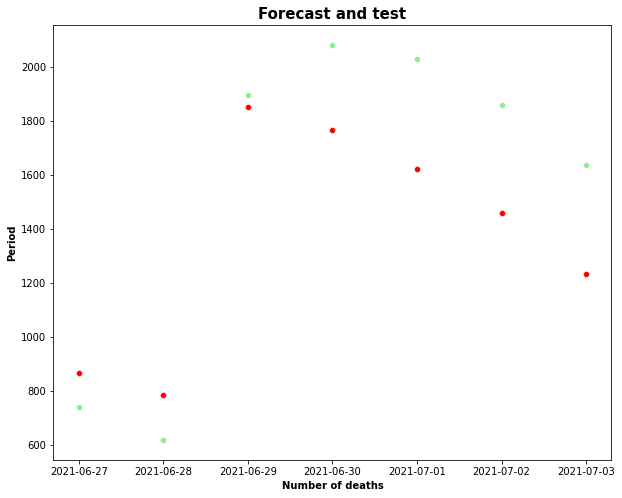

In [135]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=forecast[one_week_fcst:], x='ds', y='yhat', color='red')
sns.scatterplot(data=df_test, x='ds', y='y', color='lightgreen')
plt.title('Forecast and test', fontsize=15, weight='bold')
plt.xlabel('Number of deaths', weight='bold')
plt.ylabel('Period', weight='bold')
plt.show()

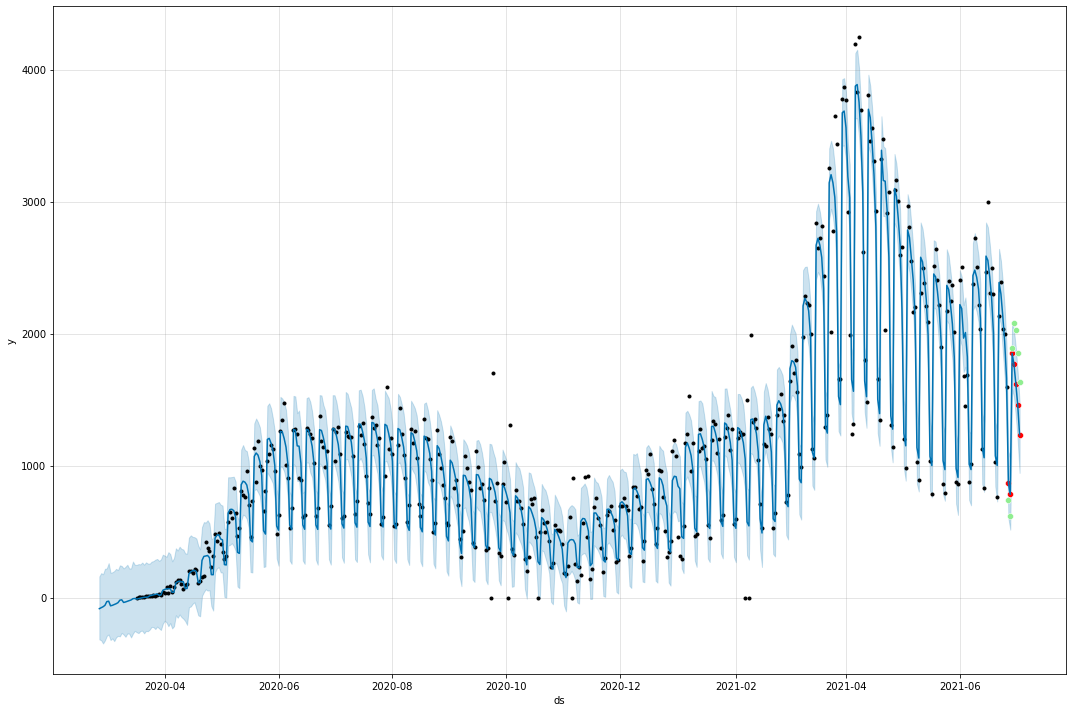

In [136]:
fig = m.plot(forecast, figsize=(15,10))
sns.scatterplot(data=forecast[one_week_fcst:], x='ds', y='yhat', color='red')
sns.scatterplot(data=df_test, x='ds', y='y', color='lightgreen')

##**Retirando os outliers**

In [137]:
df.reset_index(inplace=True)

In [138]:
no_outliers = df[(df['y'] > forecast['yhat_lower'][:one_week_fcst]) & (df['y'] < forecast['yhat_upper'][:one_week_fcst])]

In [139]:
no_outliers.drop('index', axis=1, inplace=True)

In [140]:
no_outliers

,ds,y
20,2020-03-17,1.0
21,2020-03-18,2.0
22,2020-03-19,3.0
23,2020-03-20,5.0
24,2020-03-21,4.0
...,...,...
482,2021-06-22,2131.0
483,2021-06-23,2392.0
484,2021-06-24,2032.0
485,2021-06-25,2001.0


In [141]:
m = Prophet(changepoint_prior_scale=15.0, changepoint_range=0.99, n_changepoints=50, holidays=holiday, seasonality_mode='multiplicative')
m.fit(no_outliers)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [142]:
future = m.make_future_dataframe(periods=7)

In [143]:
forecast = m.predict(future)

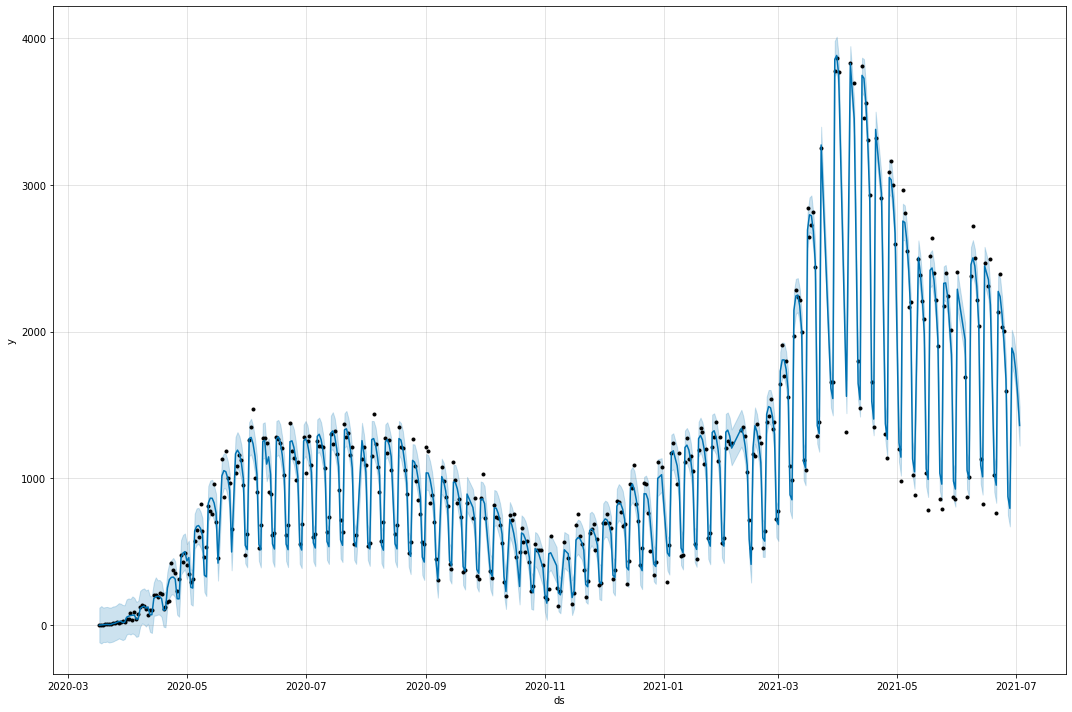

In [144]:
fig = m.plot(forecast, figsize=(15,10))
# a = add_changepoints_to_plot(fig.gca(), m, forecast)

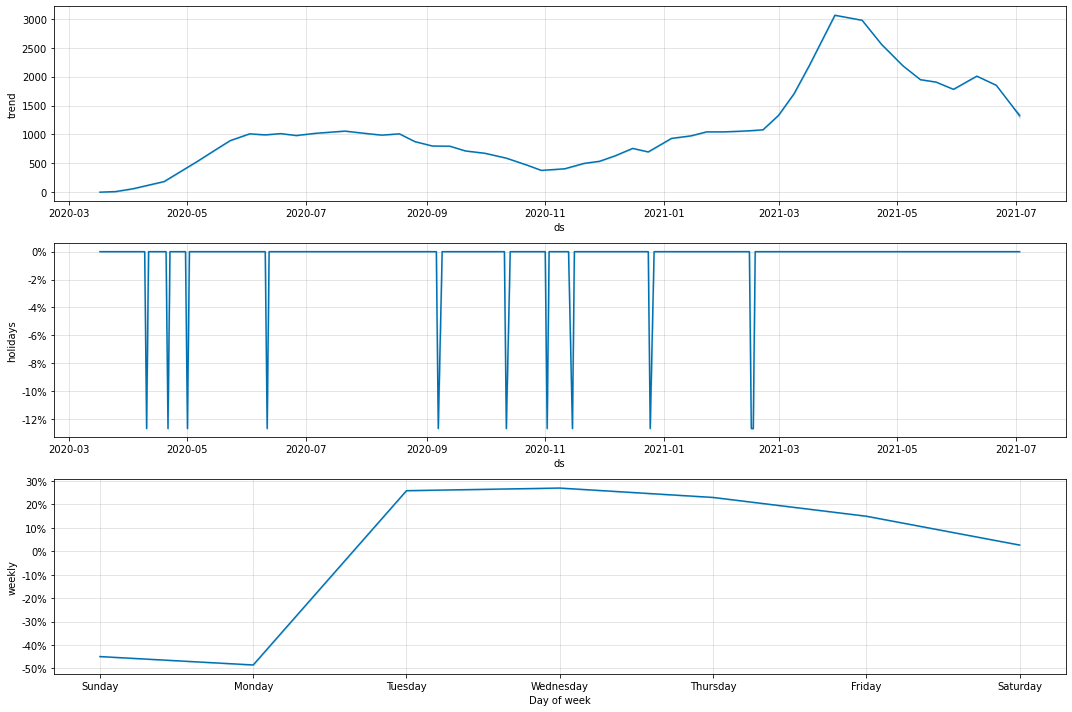

In [145]:
m.plot_components(forecast, figsize=(15,10));

In [146]:
samples = m.predictive_samples(forecast)

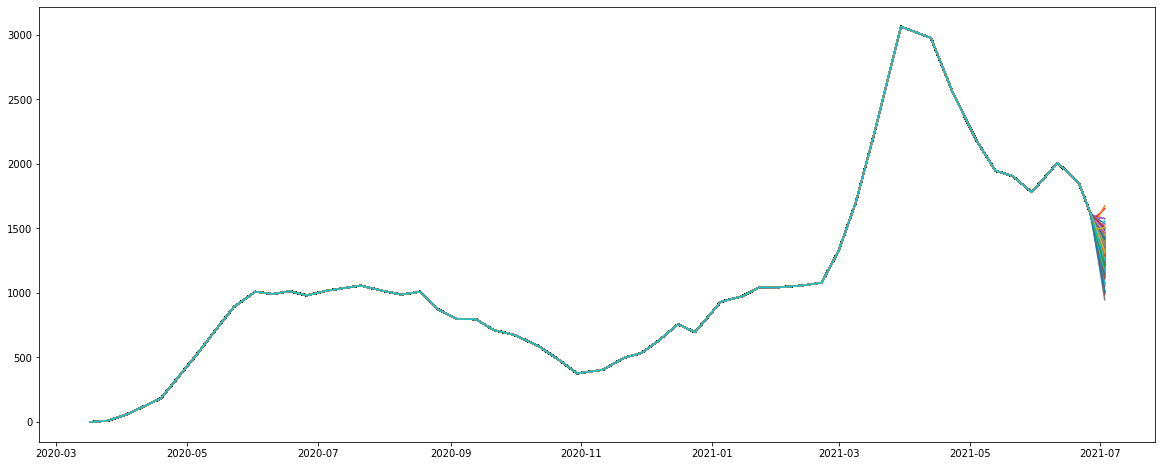

In [147]:
plt.figure(figsize=(20,8))
plt.plot(forecast['ds'], samples['trend']);

#<font size=7>**Vacinas**</font>

In [148]:
vac_2021_us = owid_us.query('date >= "2021-01-01"')
vac_2021_in = owid_india.query('date >= "2021-01-01"')
vac_2021_br = owid_brasil.query('date >= "2021-01-01"')

In [164]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = vac_2021_us['date'],
    y = vac_2021_us['new_vaccinations'],
    name='New Vaccinations - U.S.'
))

fig.add_trace(go.Bar(
    x = vac_2021_in['date'],
    y = vac_2021_in['new_vaccinations'],
    name = 'New Vaccinations - India'
))

fig.add_trace(go.Bar(
    x = vac_2021_br['date'],
    y = vac_2021_br['new_vaccinations'],
    name = 'New Vaccinations - Brazil'
))

fig.update_layout(barmode='group')

fig.update_layout(width=1700, height=700, title='Number of people vaccinated')

fig.show()

##Porcentagem da população vacinada

In [211]:
vac_ind_porc = list(owid_india['people_fully_vaccinated'].dropna())[-1] / owid_india['population'].unique()
vac_ind_porc = vac_ind_porc[0] *100
data_recente_ind = list(owid_india['date'])[-1]
print('Pocentagem da população indiana vacinada até {} é de {:.2f}%'.format(data_recente_ind, vac_ind_porc))

Pocentagem da população indiana vacinada até 2021-07-03 00:00:00 é de 4.50%


In [212]:
vac_br_porc = list(owid_brasil['people_fully_vaccinated'].dropna())[-1] / owid_brasil['population'].unique()
vac_br_porc = vac_br_porc[0] *100
data_recente_br = list(owid_brasil['date'])[-1]
print('Pocentagem da população brasileira vacinada até {} é de {:.2f}%'.format(data_recente_br, vac_br_porc))

Pocentagem da população brasileira vacinada até 2021-07-03 00:00:00 é de 12.70%


In [214]:
vac_us_porc = list(owid_us['people_fully_vaccinated'].dropna())[-1] / owid_us['population'].unique()
vac_us_porc = vac_us_porc[0]*100
data_recente_ind = list(owid_us['date'])[-1]
print('Pocentagem da população indiana vacinada até {} é de {:.2f}%'.format(data_recente_ind, vac_us_porc))

Pocentagem da população indiana vacinada até 2021-07-03 00:00:00 é de 47.43%


##Plotando o total de vacinados normalizado

In [153]:
fig = make_subplots(
    rows = 3, cols = 1,
    #specs = [[{},{}], [{'colspan':2}, None]],
    subplot_titles = ('Brazil','India', 'United States'), vertical_spacing=0.08)

fig.add_trace(go.Bar(x=owid_brasil['date'], y=owid_brasil['total_vaccinations_per_hundred'],
                     marker=dict(color=owid_brasil['total_vaccinations_per_hundred'], coloraxis='coloraxis')), 1,1)

fig.add_trace(go.Bar(x=owid_india['date'], y=owid_india['total_vaccinations_per_hundred'],
                     marker=dict(color=owid_india['total_vaccinations_per_hundred'], coloraxis='coloraxis')), 2,1)

fig.add_trace(go.Bar(x=owid_us['date'], y=owid_us['total_vaccinations_per_hundred'],
                     marker=dict(color=owid_us['total_vaccinations_per_hundred'], coloraxis='coloraxis')), 3,1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False, title_text='Total Vaccination per Hundred')

fig.update_layout(width=1000, height=1000)

fig.show()

##Plotando o numero de casos juntamente com a média móvel e apresentando uma linha vertical que indica o início da vacinação para cada país.

In [154]:
fig = make_subplots(
    rows = 3, cols = 1,
    #specs = [[{},{}], [{'colspan':2}, None]],
    subplot_titles = ('Brazil','India', 'United States'), vertical_spacing=0.1)

fig.add_trace(go.Scatter(x=owid_brasil['date'], y=owid_brasil['new_cases_smoothed'],
                         marker_color='firebrick', name='Moving avarage - BR'), 1,1)
fig.add_trace(go.Bar(x=owid_brasil['date'], y=owid_brasil['new_cases'],
                         marker_color='#569423', name='New cases - BR'), 1,1)
fig.add_shape(go.layout.Shape(type='line', yref='paper', xref='x', opacity=0.4, name='Vaccination start', 
                              x0 = str(owid_brasil[owid_brasil['new_vaccinations'] == 112]['date']).split()[1], y0 = 0.75,
                              x1 = str(owid_brasil[owid_brasil['new_vaccinations'] == 112]['date']).split()[1], y1 = 1))



fig.add_trace(go.Scatter(x=owid_india['date'], y=owid_india['new_cases_smoothed'],
                         marker_color='firebrick', name='Moving avarage - IND'), 2,1)
fig.add_trace(go.Bar(x=owid_india['date'], y=owid_india['new_cases'],
                         marker_color='#E07958', name='New cases - IND'), 2,1)
fig.add_shape(go.layout.Shape(type='line', yref='paper', xref='x', opacity=0.4, name='Vaccination start',
                              x0 = str(owid_india[owid_india['new_vaccinations'] == 191181]['date']).split()[1], y0 = 0.38,
                              x1 = str(owid_india[owid_india['new_vaccinations'] == 191181]['date']).split()[1], y1 = 0.63))


fig.add_trace(go.Scatter(x=owid_us['date'], y=owid_us['new_cases_smoothed'],
                         marker_color='firebrick', name='Moving avarage - U.S.'), 3,1)
fig.add_trace(go.Bar(x=owid_us['date'], y=owid_us['new_cases'],
                         marker_color='#1C3094', name='New cases - U.S.'), 3,1)
fig.add_shape(go.layout.Shape(type='line', yref='paper', xref='x', opacity=0.4, name='Vaccination start',
                              x0 = str(owid_us[owid_us['new_vaccinations'] == 57909]['date']).split()[1], y0 = 0.015,
                              x1 = str(owid_us[owid_us['new_vaccinations'] == 57909]['date']).split()[1], y1 = 0.26))

fig.update_layout(width=1000, height=1000)



fig.show()

##Análise - Vacinação e número de casos

**Lembrando que nesse caso uma correlação negativa indica que a vacinação afeta o surgimento de novos casos.**

In [237]:
corr_vac_casos_br = owid_brasil.query('year == 2021')[['new_cases','people_vaccinated']].corr(method = 'pearson')['people_vaccinated'][0]
ini_vac_br = list(owid_brasil[owid_brasil['new_vaccinations'] == 112]['date'])[0]
print('Correlação entre o número de pessoas vacinadas e novos casos é de {:.2f} sendo iniciada em {:%d-%m-%Y}'.format(corr_vac_casos_br, ini_vac_br))

Correlação entre o número de pessoas vacinadas e novos casos é de 0.20 sendo iniciada em 17-01-2021


###Análise Brasil

De acordo com a tabela de https://www.alura.com.br/artigos/funcao-de-autocorrelacao existe uma correlação moderada entre vacinação e o número de casos, o que indica que embora o número de pessoas vacinadas venha aumentando ao longo do tempo o número de casos ainda continua a crescer

In [241]:
corr_vac_casos_ind = owid_india.query('year == 2021')[['new_cases','people_vaccinated']].corr(method = 'pearson')['people_vaccinated'][0]
ini_vac_ind = list(owid_india[owid_india['new_vaccinations'] == 191181]['date'])[0]
print('Correlação entre o número de pessoas vacinadas e novos casos é de {:.2f} sendo iniciada em {:%d-%m-%Y}'.format(corr_vac_casos_ind, ini_vac_ind))

Correlação entre o número de pessoas vacinadas e novos casos é de 0.38 sendo iniciada em 16-01-2021


###Análise Índia

De acordo com a tabela de https://www.alura.com.br/artigos/funcao-de-autocorrelacao existe uma correlação fraca entre vacinação e o número de casos, o que indica que embora o número de pessoas vacinadas venha aumentando ao longo do tempo o número de casos ainda continua a crescer a taxas altas

In [242]:
corr_vac_casos_us = owid_us.query('year == 2021')[['new_cases','people_vaccinated']].corr(method = 'pearson')['people_vaccinated'][0]
ini_vac_us = list(owid_us[owid_us['new_vaccinations'] == 57909]['date'])[0]
print('Correlação entre o número de pessoas vacinadas e novos casos é de {:.2f} sendo iniciada em {:%d-%m-%Y}'.format(corr_vac_casos_us, ini_vac_us))

Correlação entre o número de pessoas vacinadas e novos casos é de -0.80 sendo iniciada em 21-12-2020


###Análise E.U.A

De acordo com a tabela de https://www.alura.com.br/artigos/funcao-de-autocorrelacao existe uma correlação forte entre a vacinação e o número de casos, o que indica que o programa de imunização vem surgindo efeito para o aparecimento de novos casos de covid-19.